# Topic Modelling
Groups tweets with the same topic together.

Process:
1. Combine BTM Topic modelling outputs and tweet corpus
2. Group tweet corpus together according to the highest probable topic that they are in

What to do with the data / Next steps after running this code:
1. Need to compare topics identified in the BTM terminal output with this output (note that the columns get sorted according to the highest probable topic in this code, just like with the BTM output). The sorted probabilities are also saved in a csv for cross-referencing.
2. Pipe into sentiment analysis code

In [215]:
import pandas as pd
import numpy as np

In [216]:
# load confusion matrix (pz_d) BTM output
confusion_matrix = np.loadtxt("datain/topic_modelling/k20.pz_d")
confusion_matrix = pd.DataFrame(confusion_matrix)
confusion_matrix

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,0.010324,0.001056,0.144127,0.009004,0.000806,0.009389,0.002764,0.002264,0.002907,0.000610,0.008138,0.003410,0.002637,0.151933,0.001036,0.331349,0.015676,0.296431,0.005772,0.000366
1,0.001518,0.081962,0.003803,0.340566,0.002916,0.006012,0.012783,0.105635,0.005246,0.061638,0.002760,0.007970,0.003395,0.004842,0.022294,0.003689,0.010946,0.156534,0.133139,0.032351
2,0.003756,0.398994,0.006032,0.232234,0.005056,0.011555,0.006685,0.116549,0.013543,0.067610,0.001581,0.016476,0.003239,0.007621,0.018907,0.001501,0.008723,0.043181,0.028576,0.008179
3,0.033561,0.029203,0.072125,0.013241,0.012962,0.012642,0.221874,0.044554,0.026204,0.006165,0.031834,0.061791,0.112892,0.022787,0.037670,0.023599,0.068219,0.085185,0.081243,0.002248
4,0.000108,0.000060,0.021993,0.000070,0.000093,0.011848,0.000109,0.000109,0.206957,0.032360,0.003067,0.510056,0.000027,0.047780,0.000035,0.079973,0.085158,0.000054,0.000110,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30519,0.102732,0.064844,0.005522,0.113466,0.007792,0.013064,0.032939,0.056767,0.008747,0.118794,0.149079,0.015795,0.002922,0.049932,0.020704,0.003410,0.049858,0.088224,0.087162,0.008246
30520,0.025232,0.041397,0.046742,0.005547,0.030772,0.012203,0.045007,0.011653,0.053358,0.006815,0.065746,0.029185,0.084199,0.108237,0.054392,0.011843,0.059147,0.199584,0.016660,0.092280
30521,0.002512,0.073565,0.009146,0.224474,0.003757,0.020132,0.009625,0.096925,0.025182,0.113952,0.005774,0.046658,0.088005,0.016279,0.092871,0.004047,0.007267,0.086538,0.050547,0.022746
30522,0.004275,0.005962,0.039730,0.036864,0.031171,0.004929,0.013913,0.029437,0.033352,0.264338,0.025426,0.012258,0.258295,0.028801,0.063628,0.037243,0.049439,0.008610,0.030398,0.021934


In [217]:
# load topic label probabilities (pz) BTM output
topic_probabilities = np.loadtxt("datain/topic_modelling/k20.pz")
topic_probabilities

array([0.0591403, 0.0516935, 0.0489629, 0.0535898, 0.0475932, 0.0466161,
       0.0444932, 0.0512753, 0.0497465, 0.0444278, 0.0505578, 0.0475813,
       0.0570564, 0.0506589, 0.0491974, 0.0469444, 0.0540747, 0.0562696,
       0.048657 , 0.0414639])

In [218]:
# sort confusion matrix according to highest topic probability
df = confusion_matrix.T
df['probs'] = topic_probabilities
df = df.sort_values(by='probs', ascending=False).T
df

,0,12,17,16,3,1,7,13,10,8,14,2,18,4,11,15,5,6,9,19
0,0.010324,0.002637,0.296431,0.015676,0.009004,0.001056,0.002264,0.151933,0.008138,0.002907,0.001036,0.144127,0.005772,0.000806,0.003410,0.331349,0.009389,0.002764,0.000610,0.000366
1,0.001518,0.003395,0.156534,0.010946,0.340566,0.081962,0.105635,0.004842,0.002760,0.005246,0.022294,0.003803,0.133139,0.002916,0.007970,0.003689,0.006012,0.012783,0.061638,0.032351
2,0.003756,0.003239,0.043181,0.008723,0.232234,0.398994,0.116549,0.007621,0.001581,0.013543,0.018907,0.006032,0.028576,0.005056,0.016476,0.001501,0.011555,0.006685,0.067610,0.008179
3,0.033561,0.112892,0.085185,0.068219,0.013241,0.029203,0.044554,0.022787,0.031834,0.026204,0.037670,0.072125,0.081243,0.012962,0.061791,0.023599,0.012642,0.221874,0.006165,0.002248
4,0.000108,0.000027,0.000054,0.085158,0.000070,0.000060,0.000109,0.047780,0.003067,0.206957,0.000035,0.021993,0.000110,0.000093,0.510056,0.079973,0.011848,0.000109,0.032360,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30520,0.025232,0.084199,0.199584,0.059147,0.005547,0.041397,0.011653,0.108237,0.065746,0.053358,0.054392,0.046742,0.016660,0.030772,0.029185,0.011843,0.012203,0.045007,0.006815,0.092280
30521,0.002512,0.088005,0.086538,0.007267,0.224474,0.073565,0.096925,0.016279,0.005774,0.025182,0.092871,0.009146,0.050547,0.003757,0.046658,0.004047,0.020132,0.009625,0.113952,0.022746
30522,0.004275,0.258295,0.008610,0.049439,0.036864,0.005962,0.029437,0.028801,0.025426,0.033352,0.063628,0.039730,0.030398,0.031171,0.012258,0.037243,0.004929,0.013913,0.264338,0.021934
30523,0.001475,0.001837,0.089709,0.008352,0.315654,0.020722,0.059698,0.021014,0.001704,0.000547,0.043464,0.001659,0.067008,0.007017,0.012038,0.005820,0.035429,0.000961,0.299839,0.006054


In [219]:
# rename columns from 1-k (K being the number of columns)
mapping = {col_name: i for col_name, i in zip(df.columns, range(20))}
df = df.rename(mapping, axis=1)

In [220]:
# load teet corpus data
tweet_corpus = pd.read_csv("datain/topic_modelling/cleaned100k_with_time.txt", header=None)
tweet_corpus = pd.DataFrame(tweet_corpus)

In [221]:
# add tweet corpus data to the confusion matrix
df.insert(0, "createdAt", tweet_corpus[0])
df.insert(1, "corpus", tweet_corpus[1])
df

,createdAt,corpus,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,2021-05-31 23:59:26,spud steem my first participation june powerup...,0.010324,0.002637,0.296431,0.015676,0.009004,0.001056,0.002264,0.151933,...,0.001036,0.144127,0.005772,0.000806,0.003410,0.331349,0.009389,0.002764,0.000610,0.000366
1,2021-05-31 23:58:12,nice project,0.001518,0.003395,0.156534,0.010946,0.340566,0.081962,0.105635,0.004842,...,0.022294,0.003803,0.133139,0.002916,0.007970,0.003689,0.006012,0.012783,0.061638,0.032351
2,2021-05-31 23:57:08,hopefully this project is a success and then i...,0.003756,0.003239,0.043181,0.008723,0.232234,0.398994,0.116549,0.007621,...,0.018907,0.006032,0.028576,0.005056,0.016476,0.001501,0.011555,0.006685,0.067610,0.008179
3,2021-05-31 23:56:43,love in the time of chaos editions left tez ea...,0.033561,0.112892,0.085185,0.068219,0.013241,0.029203,0.044554,0.022787,...,0.037670,0.072125,0.081243,0.012962,0.061791,0.023599,0.012642,0.221874,0.006165,0.002248
4,2021-05-31 23:56:06,navigate the net for sale on,0.000108,0.000027,0.000054,0.085158,0.000070,0.000060,0.000109,0.047780,...,0.000035,0.021993,0.000110,0.000093,0.510056,0.079973,0.011848,0.000109,0.032360,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30520,2021-05-23 16:48:41,no i didn t give anyone my seed phrase nor wou...,0.025232,0.084199,0.199584,0.059147,0.005547,0.041397,0.011653,0.108237,...,0.054392,0.046742,0.016660,0.030772,0.029185,0.011843,0.012203,0.045007,0.006815,0.092280
30521,2021-05-23 16:48:23,very good project join now my friends,0.002512,0.088005,0.086538,0.007267,0.224474,0.073565,0.096925,0.016279,...,0.092871,0.009146,0.050547,0.003757,0.046658,0.004047,0.020132,0.009625,0.113952,0.022746
30522,2021-05-23 16:48:23,few more weeks i can tell my wife about my add...,0.004275,0.258295,0.008610,0.049439,0.036864,0.005962,0.029437,0.028801,...,0.063628,0.039730,0.030398,0.031171,0.012258,0.037243,0.004929,0.013913,0.264338,0.021934
30523,2021-05-23 16:48:22,i liked this project weyu,0.001475,0.001837,0.089709,0.008352,0.315654,0.020722,0.059698,0.021014,...,0.043464,0.001659,0.067008,0.007017,0.012038,0.005820,0.035429,0.000961,0.299839,0.006054


In [222]:
# remove the topic probability row (used to sort the dataframe)
df = df.drop("probs")

In [223]:
csv = df
csv

,createdAt,corpus,0,1,2,3,4,5,6,7,...,10,11,12,13,14,15,16,17,18,19
0,2021-05-31 23:59:26,spud steem my first participation june powerup...,0.010324,0.002637,0.296431,0.015676,0.009004,0.001056,0.002264,0.151933,...,0.001036,0.144127,0.005772,0.000806,0.003410,0.331349,0.009389,0.002764,0.000610,0.000366
1,2021-05-31 23:58:12,nice project,0.001518,0.003395,0.156534,0.010946,0.340566,0.081962,0.105635,0.004842,...,0.022294,0.003803,0.133139,0.002916,0.007970,0.003689,0.006012,0.012783,0.061638,0.032351
2,2021-05-31 23:57:08,hopefully this project is a success and then i...,0.003756,0.003239,0.043181,0.008723,0.232234,0.398994,0.116549,0.007621,...,0.018907,0.006032,0.028576,0.005056,0.016476,0.001501,0.011555,0.006685,0.067610,0.008179
3,2021-05-31 23:56:43,love in the time of chaos editions left tez ea...,0.033561,0.112892,0.085185,0.068219,0.013241,0.029203,0.044554,0.022787,...,0.037670,0.072125,0.081243,0.012962,0.061791,0.023599,0.012642,0.221874,0.006165,0.002248
4,2021-05-31 23:56:06,navigate the net for sale on,0.000108,0.000027,0.000054,0.085158,0.000070,0.000060,0.000109,0.047780,...,0.000035,0.021993,0.000110,0.000093,0.510056,0.079973,0.011848,0.000109,0.032360,0.000032
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30519,2021-05-23 16:49:38,an interesting project with great prospects a ...,0.102732,0.002922,0.088224,0.049858,0.113466,0.064844,0.056767,0.049932,...,0.020704,0.005522,0.087162,0.007792,0.015795,0.003410,0.013064,0.032939,0.118794,0.008246
30520,2021-05-23 16:48:41,no i didn t give anyone my seed phrase nor wou...,0.025232,0.084199,0.199584,0.059147,0.005547,0.041397,0.011653,0.108237,...,0.054392,0.046742,0.016660,0.030772,0.029185,0.011843,0.012203,0.045007,0.006815,0.092280
30521,2021-05-23 16:48:23,very good project join now my friends,0.002512,0.088005,0.086538,0.007267,0.224474,0.073565,0.096925,0.016279,...,0.092871,0.009146,0.050547,0.003757,0.046658,0.004047,0.020132,0.009625,0.113952,0.022746
30522,2021-05-23 16:48:23,few more weeks i can tell my wife about my add...,0.004275,0.258295,0.008610,0.049439,0.036864,0.005962,0.029437,0.028801,...,0.063628,0.039730,0.030398,0.031171,0.012258,0.037243,0.004929,0.013913,0.264338,0.021934


In [224]:
# get the columns representing the topics
topics = list(csv.columns[2:])
topics

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]

In [226]:
# selecting only the columns that denote probabilities for each topic
maxtopic = csv[topics]
# get the topic with the max probability value for each row
maxtopic = maxtopic.idxmax(axis=1)
# replace all NaN values with 100
maxtopic = maxtopic.fillna(100)
# convert all topics from string ('15') to int (15). This prerpares it for grouping by topic
maxtopic = maxtopic.astype(int)
# add this as a new column
csv.insert(0, "maxtopic", maxtopic)
# csv['maxtopic'] = maxtopic

In [227]:
# group by topic
csv = csv.sort_values('maxtopic')
csv

,maxtopic,createdAt,corpus,0,1,2,3,4,5,6,...,10,11,12,13,14,15,16,17,18,19
20961,0,2021-05-26 06:34:56,our new favorite hash tag is,0.305799,0.018634,0.004217,0.042965,0.052706,0.016674,0.198810,...,0.121045,0.013326,0.018190,0.011485,0.043135,0.016779,0.033596,0.028288,0.007975,0.002263
6759,0,2021-05-30 06:36:50,watch pump video lets re sell this girl,0.166496,0.062920,0.111424,0.091624,0.034627,0.114326,0.026785,...,0.046501,0.045684,0.016113,0.025628,0.053501,0.014988,0.036908,0.016433,0.017034,0.000930
5260,0,2021-05-30 16:29:15,hope hand painted oil painting splash ink art ...,0.278566,0.009146,0.012577,0.032207,0.037131,0.023585,0.022179,...,0.043005,0.015972,0.048832,0.008790,0.035074,0.023695,0.018335,0.250151,0.018083,0.003136
16594,0,2021-05-27 08:42:19,you want us to check your drop them here follo...,0.084840,0.062317,0.038404,0.026845,0.054257,0.031341,0.081703,...,0.051452,0.034361,0.046284,0.018704,0.065752,0.046076,0.040645,0.024324,0.020982,0.076721
16601,0,2021-05-27 08:37:47,these are the first pieces minted in my vast c...,0.410317,0.012436,0.014938,0.049294,0.029099,0.032605,0.028747,...,0.025725,0.020957,0.017465,0.014184,0.039511,0.011917,0.028390,0.020966,0.007130,0.004350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26959,100,2021-05-25 00:48:51,just an nft on,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10319,100,2021-05-29 01:20:58,or and,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16463,100,2021-05-27 09:34:19,what is nft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17895,100,2021-05-26 20:52:52,what s an nft,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [228]:
# export data to csv
csv.to_csv('dataout/grouped-by-topic_with_date.csv')

# Plot data

In [229]:
# count the number of tweets per topic
from collections import Counter
topic2occurrences = Counter(csv['maxtopic'])
topic2occurrences['No Topic'] = topic2occurrences[100]
del topic2occurrences[100]
topic2occurrences

Counter({0: 1840,
         1: 1776,
         2: 2020,
         3: 1768,
         4: 4290,
         5: 1406,
         6: 1076,
         7: 1282,
         8: 1585,
         9: 1276,
         10: 1128,
         11: 1129,
         12: 1206,
         13: 718,
         14: 1010,
         15: 1025,
         16: 1075,
         17: 788,
         18: 1257,
         19: 2756,
         'No Topic': 113})

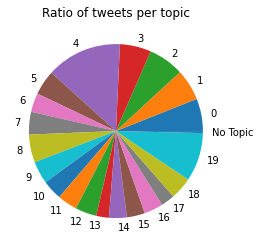

In [230]:
# Plot ratio of tweets per topic
import matplotlib.pyplot as plt
import numpy as np

ys = []
labels = []
for topic, occurrences in topic2occurrences.items():
    labels.append(topic)
    ys.append(occurrences)

plt.pie(ys, labels=labels)
plt.title('Ratio of tweets per topic')
plt.show() 

# Test

In [231]:
def test_output(topic_number):
    '''
        Check if previous topic grouping is the same as the automated coding topic grouping
    '''
    prev_topic_grouping = pd.read_csv("test/grouped-by-topic_with_date.csv")
    prev_topic_grouping = sorted(prev_topic_grouping[prev_topic_grouping["maxtopic"] == topic_number]["Topic (Unsorted)"])
    
    automated_topic_grouping = sorted(csv[csv["maxtopic"] == topic_number].index)
    return prev_topic_grouping == automated_topic_grouping

In [232]:
# test if prev topic classification is the same as new automated topic classification
comparison = []
for topic in range(20):
    comparison.append(test_output(topic))
all(comparison) # check if all elements in list are True

True